In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv("./survey_results_public.csv")

In [3]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_clean = df[['Salary', 'HaveWorkedLanguage', 'HaveWorkedFramework', 'HaveWorkedDatabase']].dropna()

In [18]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6432 entries, 17 to 51390
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Salary               6432 non-null   float64
 1   HaveWorkedLanguage   6432 non-null   object 
 2   HaveWorkedFramework  6432 non-null   object 
 3   HaveWorkedDatabase   6432 non-null   object 
dtypes: float64(1), object(3)
memory usage: 251.2+ KB


In [19]:
df_clean = df_clean.dropna(subset=['Salary'])

In [20]:
df_clean.isnull().mean()

Salary                 0.0
HaveWorkedLanguage     0.0
HaveWorkedFramework    0.0
HaveWorkedDatabase     0.0
dtype: float64

In [21]:
# split values that combine together to go in analysis correctely
df_clean['HaveWorkedLanguage'] = df_clean['HaveWorkedLanguage'].str.split(';')
df_exploded_lang = df_clean.explode('HaveWorkedLanguage')

df_clean['HaveWorkedDatabase'] = df_clean['HaveWorkedDatabase'].str.split(';')
df_exploded_database = df_clean.explode('HaveWorkedDatabase')

df_clean['HaveWorkedFramework'] = df_clean['HaveWorkedFramework'].str.split(';')
df_exploded_framework = df_clean.explode('HaveWorkedFramework')


HaveWorkedLanguage
Swift          95000.000000
Smalltalk      90322.580645
Scala          90078.325989
 Julia         82516.470387
 Rust          80160.244819
                   ...     
Rust           38709.677419
R              32258.064516
PHP            28974.496440
Objective-C    28863.831758
Lua            28787.878788
Name: Salary, Length: 66, dtype: float64


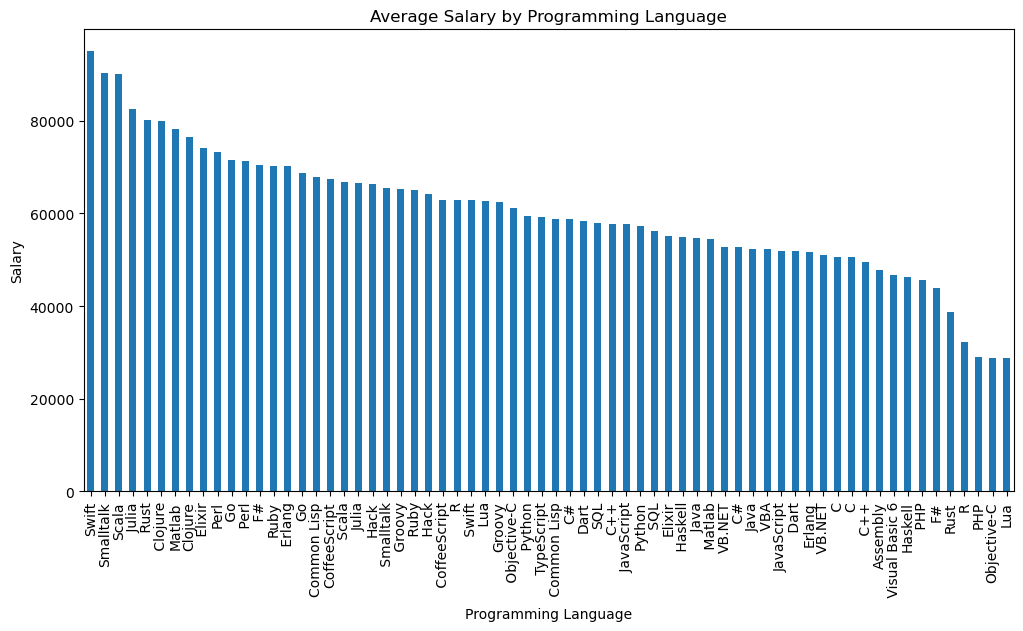

In [31]:
salary_by_language = df_exploded_lang.groupby('HaveWorkedLanguage')['Salary'].mean().sort_values(ascending=False)

print(salary_by_language)

plt.figure(figsize=(12, 6))
salary_by_language.plot(kind='bar');
plt.title('Average Salary by Programming Language')
plt.ylabel('Salary')
plt.xlabel('Programming Language')
plt.show()

HaveWorkedFramework
 Spark        72356.688506
Spark         70369.376169
 Hadoop       67785.338394
Hadoop        65142.909908
 React        63037.624960
React         62598.019195
Node.js       59423.835277
 .NET Core    58566.133604
 Xamarin      57564.428259
 Node.js      56647.613827
AngularJS     54885.940603
.NET Core     54574.269795
Xamarin       52492.078826
 Firebase     50745.367094
 Cordova      45719.970200
Cordova       42252.492727
Firebase      30670.540153
Name: Salary, dtype: float64


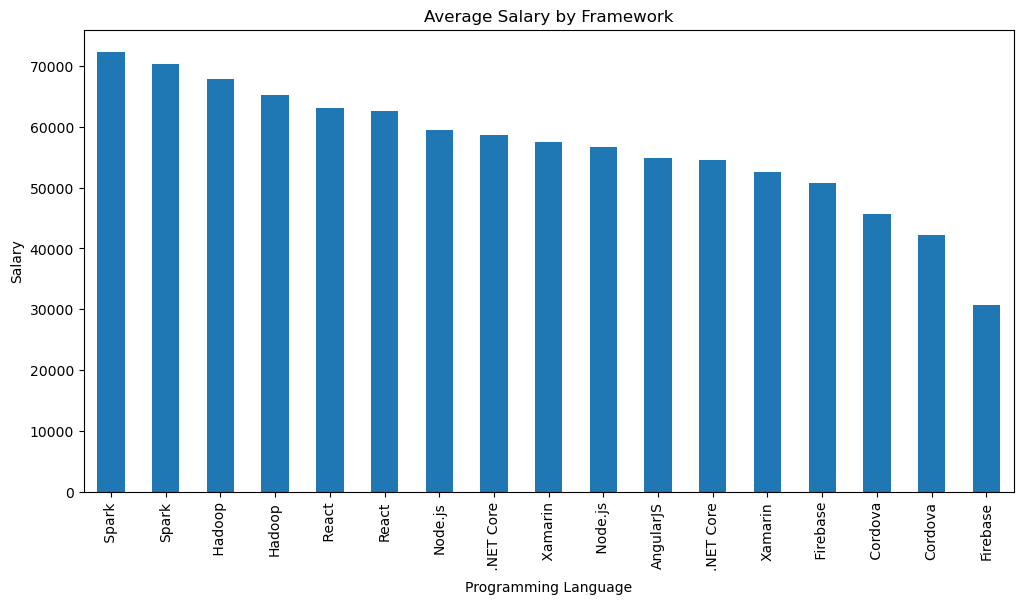

In [29]:
salary_by_framework = df_exploded_framework.groupby('HaveWorkedFramework')['Salary'].mean().sort_values(ascending=False)

print(salary_by_framework)

plt.figure(figsize=(12, 6))
salary_by_framework.plot(kind='bar')
plt.title('Average Salary by Framework')
plt.ylabel('Salary')
plt.xlabel('Programming Language')
plt.show()


HaveWorkedDatabase
Cassandra      74636.833833
 MongoDB       68674.140898
Redis          67031.342593
 SQL Server    62440.120895
 Redis         60706.038092
 PostgreSQL    59151.501250
PostgreSQL     57563.209127
SQL Server     56632.751732
Oracle         56491.997542
MongoDB        54059.720534
 MySQL         53417.859883
 Oracle        52290.206523
SQLite         51884.743717
 SQLite        51651.671965
MySQL          46262.956190
Name: Salary, dtype: float64


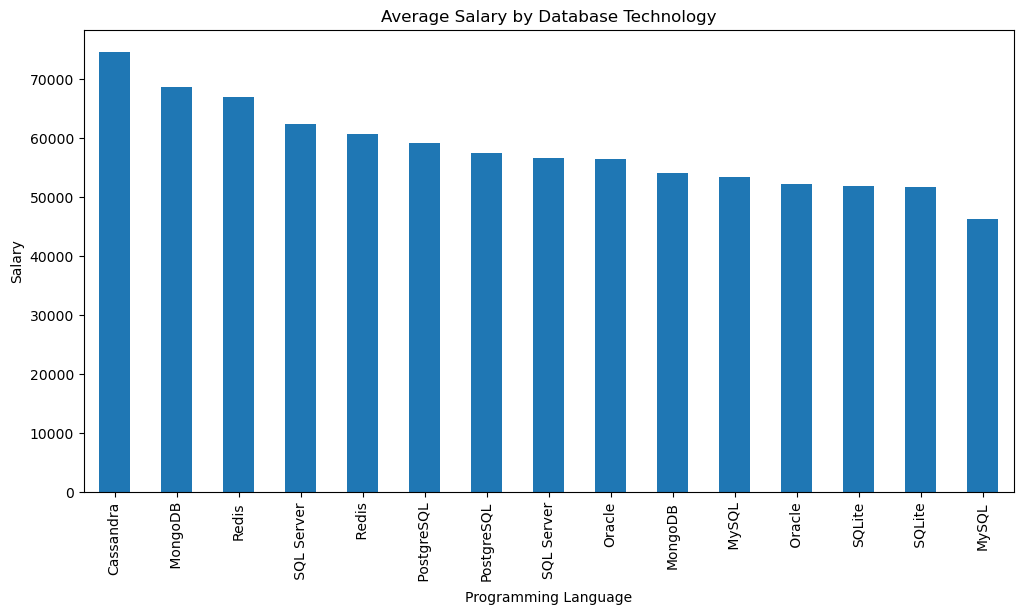

In [30]:
salary_by_database = df_exploded_database.groupby('HaveWorkedDatabase')['Salary'].mean().sort_values(ascending=False)

print(salary_by_database)

plt.figure(figsize=(12, 6))
salary_by_database.plot(kind='bar')
plt.title('Average Salary by Database Technology')
plt.ylabel('Salary')
plt.xlabel('Programming Language')
plt.show()



In [61]:
df_dummies = pd.get_dummies(df_exploded_lang[['Salary' , 'HaveWorkedLanguage']], drop_first=True)

X = df_dummies.drop('Salary' , axis=1)
y = df_dummies['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

coef_model_lang = model.coef_
print(coef_model_lang)

[  2266.93764003  -1769.79616053  28953.40527551  11991.65222865
  14865.73243717   1929.43417894  25475.31961278  16346.59101631
  22015.05464547  21268.89404175  14737.16759714  18461.42755811
   5707.57838903   3161.53221995   7456.58357179  15993.23673466
  12271.39330367   3641.16262888  11721.67213624  -4231.54212663
  21641.78890477   9010.97475441  13765.76617565  14901.09707215
  30749.64838294   4954.07826443  16659.57910842  13312.73469432
  11688.9192287    9898.01996743   1704.99732412   3785.88855989
  -5028.68346193  -3957.34976574    343.57650781   8610.31868141
   7140.13700388  25735.23818519  16463.270789     8602.32816095
   5621.05494948   3181.3862992    7648.45122956  24530.47289555
  17918.39453298  12754.22210611   7954.3811621   -2136.67451996
   1499.42242234   1846.21078622  13542.53789792 -21488.09992948
  27976.70945469 -19697.25316305 -19942.87018022  22953.05354071
   7553.36373592 -18017.91420123   8018.36183945 -11566.301298
   3984.77554319  44958.770

In [62]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = coef_model_lang
coefs_df['abs_coefs'] = np.abs(coef_model_lang)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)

coefs_df.head()

,est_int,coefs,abs_coefs
61,HaveWorkedLanguage_Scala,44958.770779,44958.770779
63,HaveWorkedLanguage_Swift,44724.021283,44724.021283
62,HaveWorkedLanguage_Smalltalk,40046.601928,40046.601928
24,HaveWorkedLanguage_ Rust,30749.648383,30749.648383
2,HaveWorkedLanguage_ Clojure,28953.405276,28953.405276


In [63]:
df_dummies = pd.get_dummies(df_exploded_database[['Salary' , 'HaveWorkedDatabase']], drop_first=True)

X = df_dummies.drop('Salary' , axis=1)
y = df_dummies['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

coef_model_database = model.coef_

In [64]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = coef_model_database
coefs_df['abs_coefs'] = np.abs(coef_model_database)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)

coefs_df.head()

,est_int,coefs,abs_coefs
8,HaveWorkedDatabase_MySQL,-21411.907262,21411.907262
5,HaveWorkedDatabase_ SQLite,-16615.000068,16615.000068
0,HaveWorkedDatabase_ MySQL,-15075.695073,15075.695073
13,HaveWorkedDatabase_SQLite,-14770.008519,14770.008519
1,HaveWorkedDatabase_ Oracle,-13921.649690,13921.649690


In [65]:
df_dummies = pd.get_dummies(df_exploded_framework[['Salary' , 'HaveWorkedFramework']], drop_first=True)

X = df_dummies.drop('Salary' , axis=1)
y = df_dummies['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
coef_model_framework = model.coef_
print(coef_model_framework)

[-12829.02454044  -8617.29221113   9288.67134011  -2534.32185794
   4520.29303794  13235.21905061  -1647.45056906  -4003.54877222
  -4468.60317825 -18520.08441695 -28575.83909012   4187.44330857
    169.56193917   2750.22075964   9891.60449347  -7987.44849182]


In [66]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = coef_model_framework
coefs_df['abs_coefs'] = np.abs(coef_model_framework)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)

coefs_df.head()

,est_int,coefs,abs_coefs
10,HaveWorkedFramework_Firebase,-28575.839090,28575.839090
9,HaveWorkedFramework_Cordova,-18520.084417,18520.084417
5,HaveWorkedFramework_ Spark,13235.219051,13235.219051
0,HaveWorkedFramework_ Cordova,-12829.024540,12829.024540
14,HaveWorkedFramework_Spark,9891.604493,9891.604493


After all analysis, I discover that the most languages or technologies correlated with higher income are Scala, Swift, Smalltalk.